## Packages

In [280]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import datetime

## Open Data 

In [302]:
#Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv')
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

## Species richness over the years

### Direction1, Direction2, local, total richesse spécifique par an

In [303]:
data_dir1 = data_day.loc[data_day['direction1'] > 0]
data_dir2 = data_day.loc[data_day['direction2'] > 0]
data_local = data_day.loc[data_day['maxlocal'] > 0]

species_richness_dir1 = data_dir1.groupby('year')['species'].nunique().reset_index(name='Migration nord-sud')
species_richness_dir2 = data_dir2.groupby('year')['species'].nunique().reset_index(name='Migration sud-nord')
species_richness_local = data_local.groupby('year')['species'].nunique().reset_index(name='Local')
species_richness_total = data_day.groupby('year')['species'].nunique().reset_index(name='Total')

species_richness = species_richness_dir1.merge(species_richness_dir2, on='year').merge(species_richness_local, on='year').merge(species_richness_total, on='year')

species_richness = species_richness.melt(id_vars=['year'],
                    value_vars=['Total', 'Migration nord-sud', 'Migration sud-nord', 'Local'],
                    var_name='Statut',
                    value_name='Richesse spécifique')

species_richness

,year,Statut,Richesse spécifique
0,2016,Total,42
1,2017,Total,68
2,2018,Total,40
3,2019,Total,56
4,2021,Total,134
5,2022,Total,139
6,2023,Total,124
7,2016,Migration nord-sud,35
8,2017,Migration nord-sud,60
9,2018,Migration nord-sud,35


AttributeError: 'list' object has no attribute 'get_figure'

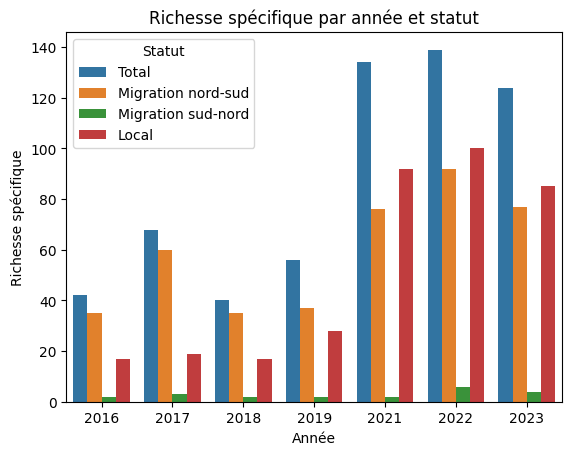

In [308]:
richesse_specifique = sns.barplot(data=species_richness, x='year', y='Richesse spécifique', hue='Statut').set(xlabel ="Année", ylabel = "Richesse spécifique", title ="Richesse spécifique par année et statut")

## Nombre d'observateurs

[Text(0.5, 0, 'Année'),
 Text(0, 0.5, "Somme du nombre d'observateurs journaliers"),
 Text(0.5, 1.0, "Somme du nombre d'observateurs journaliers par année")]

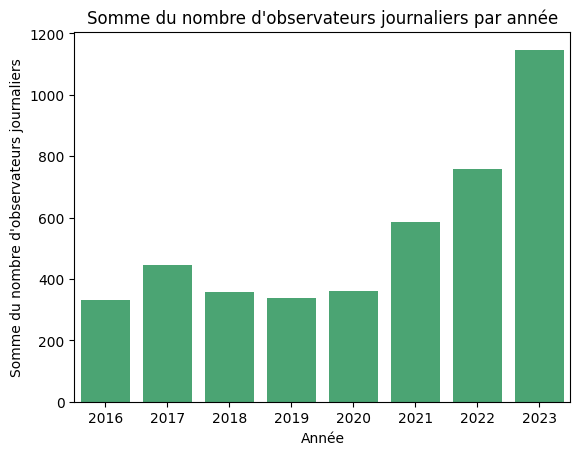

In [9]:
date_observers = data_day[['date_dt', 'year', 'n_observers']].drop_duplicates()
n_observers_per_year = date_observers.groupby(['year'])['n_observers'].sum().reset_index()
sns.barplot(data=n_observers_per_year, x='year', y='n_observers', color='mediumseagreen').set(xlabel ="Année", ylabel = "Somme du nombre d'observateurs journaliers", title ="Somme du nombre d'observateurs journaliers par année")

## Effectif Milan noir, milan royal, cigogne blanche. cigogne noire, épervier d'europe, bondrée apivore par AN

In [10]:
liste_especes = data_day[data_day['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
n_obs_species_year

,species,year,direction1
0,Bondrée apivore,2016,4517.0
1,Bondrée apivore,2017,4907.0
2,Bondrée apivore,2018,6232.0
3,Bondrée apivore,2019,5546.0
4,Bondrée apivore,2020,5229.0
5,Bondrée apivore,2021,2708.0
6,Bondrée apivore,2022,3927.0
7,Bondrée apivore,2023,6015.0
8,Cigogne blanche,2016,143.0
9,Cigogne blanche,2017,98.0


In [11]:
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
n_obs_species_year.head()

,species,year,direction1
0,Bondrée apivore,2016,4517.0
1,Bondrée apivore,2017,4907.0
2,Bondrée apivore,2018,6232.0
3,Bondrée apivore,2019,5546.0
4,Bondrée apivore,2020,5229.0


[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

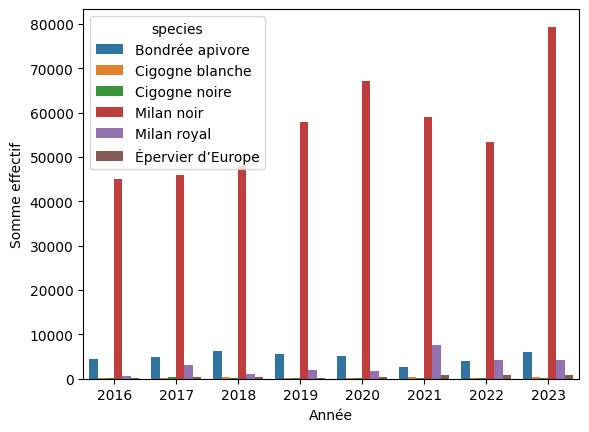

In [12]:
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")

[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

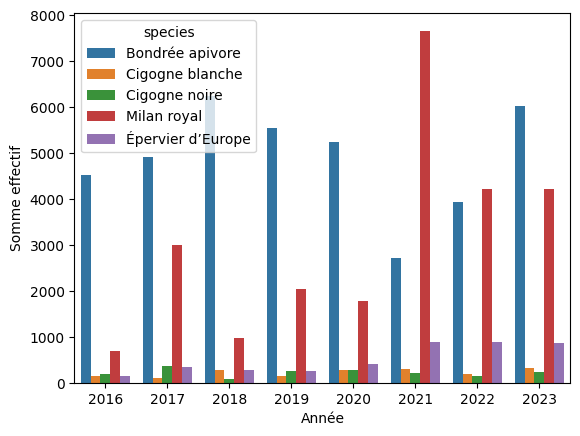

In [13]:
liste_especes = data_day[data_day['species'].isin(['Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")


[Text(0.5, 0, 'Année'), Text(0, 0.5, 'Somme effectif'), Text(0.5, 1.0, '')]

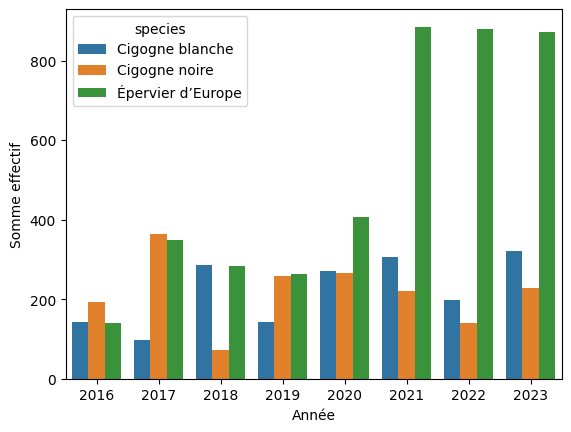

In [14]:
liste_especes = data_day[data_day['species'].isin(['Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
n_obs_species_year = liste_especes.groupby(['species', 'year'])['direction1'].sum().reset_index()
sns.barplot(data=n_obs_species_year, x='year', y='direction1', hue='species').set(xlabel ="Année", ylabel = "Somme effectif", title ="")

## Effectif Milan noir, milan royal, cigogne blanche, cigogne noire, épervier d'europe, bondrée apivore par JOUR

In [140]:
liste_especes = data_day[data_day['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
liste_especes.head(2)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
4,2016-07-15,2016,7,15,08:24:00,18:48:00,10.4,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,7,61.857143,0.0,0.142857
8,2016-07-16,2016,7,16,08:24:00,17:00:00,8.6,"MR, QD",2.0,NaN,...,0.0,NaN,NaN,NaN,1000.0,13.0,2,0.500000,0.0,0.000000


## Phénologie de passage - pic de migration pour les 6 especes

In [164]:
species_sum_day = liste_especes.groupby(['year', 'date_dt', 'species'])['direction1'].sum().reset_index()

species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])

species_sum_day['day_month'] = species_sum_day['date_dt'].dt.strftime('%d-%B')

# Convert month to French
month_translation = {
    'June': 'juin', 'July': 'juil', 'August': 'août', 'September': 'sept', 'October': 'oct', 'November': 'novembre'
}

species_sum_day['day_month'] = species_sum_day['day_month'].replace(month_translation, regex=True)
species_sum_day = species_sum_day.sort_values(by='date_dt')


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_81699/746442482.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])


In [165]:
species_sum_day.head()

,year,date_dt,species,direction1,day_month
0,2016,2016-07-15,Milan noir,433.0,15-juil
1,2016,2016-07-16,Cigogne noire,1.0,16-juil
2,2016,2016-07-16,Milan noir,376.0,16-juil
3,2016,2016-07-17,Cigogne noire,1.0,17-juil
4,2016,2016-07-17,Milan noir,88.0,17-juil


In [166]:
species_sum_day.day_month.unique()

array(['15-juil', '16-juil', '17-juil', '18-juil', '19-juil', '20-juil',
       '23-juil', '24-juil', '25-juil', '26-juil', '27-juil', '28-juil',
       '29-juil', '30-juil', '01-août', '02-août', '03-août', '05-août',
       '06-août', '07-août', '08-août', '09-août', '10-août', '11-août',
       '12-août', '13-août', '14-août', '15-août', '16-août', '17-août',
       '19-août', '21-août', '22-août', '23-août', '24-août', '25-août',
       '26-août', '27-août', '28-août', '30-août', '31-août', '01-sept',
       '02-sept', '03-sept', '04-sept', '05-sept', '06-sept', '07-sept',
       '09-sept', '10-sept', '11-sept', '12-sept', '13-sept', '15-sept',
       '20-sept', '21-sept', '22-sept', '27-sept', '28-sept', '03-oct',
       '04-oct', '15-oct', '21-juil', '22-juil', '31-juil', '04-août',
       '18-août', '20-août', '29-août', '08-sept', '16-sept', '17-sept',
       '19-sept', '23-sept', '24-sept', '26-sept', '29-sept', '05-oct',
       '08-oct', '14-oct', '14-juil', '14-sept', '25-se

In [167]:
sorted_selected_dates = [

    '15-juil', '16-juil', '17-juil', '18-juil', '19-juil',
    '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil',
    '27-juil', '28-juil', '29-juil', '30-juil', '31-juil',

    '01-août', '02-août',
    '03-août', '04-août', '05-août', '06-août', '07-août', '08-août', '09-août',
    '10-août', '11-août', '12-août', '13-août', '14-août', '15-août', '16-août',
    '17-août', '18-août', '19-août', '20-août', '21-août', '22-août', '23-août',
    '24-août', '25-août', '26-août', '27-août', '28-août', '29-août', '30-août',
    '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept', '06-sept',
    '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept', '13-sept',
    '14-sept', '15-sept', '16-sept', '17-sept', '18-sept', '19-sept', '20-sept',
    '21-sept', '22-sept', '23-sept', '24-sept', '25-sept', '26-sept', '27-sept',
    '28-sept', '29-sept', '30-sept'

]


In [238]:
# Filter DataFrame
species_sum_day = species_sum_day[species_sum_day['day_month'].isin(sorted_selected_dates)]

# Create a categorical type with the desired order
species_sum_day['day_month'] = pd.Categorical(species_sum_day['day_month'], categories=sorted_selected_dates, ordered=True)

# Sort DataFrame by the categorical column
sorted_species_sum_day = species_sum_day.sort_values('day_month')

sorted_species_sum_day.rename(columns={'year':'Année'}, inplace=True)

sorted_species_sum_day.head()


,Année,date_dt,species,direction1,day_month
0,2016,2016-07-15,Milan noir,433.0,15-juil
1514,2023,2023-07-15,Milan noir,104.0,15-juil
1250,2022,2022-07-15,Milan noir,425.0,15-juil
190,2017,2017-07-15,Milan noir,1529.0,15-juil
992,2021,2021-07-15,Milan noir,11.0,15-juil


### Milan noir

In [245]:
milan_noir = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan noir'])]
milan_noir.species.unique()

array(['Milan noir'], dtype=object)

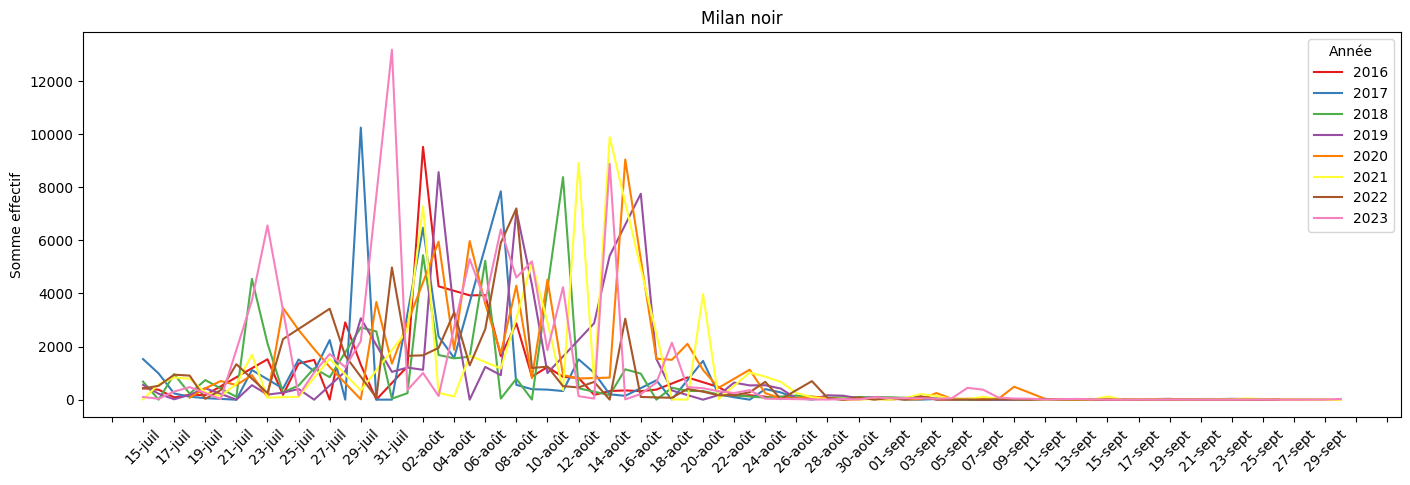

In [246]:
# Figure all years
plt.figure(figsize=(17, 5))

milan_noir_plot = sns.lineplot(data=milan_noir, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_noir_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Milan noir");

#Save image to folder
fig = milan_noir_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/distribution_effectif_milan_noir_jour_tous_les_ans.png')

In [247]:
milan_noir_2020_to_2023 = milan_noir[milan_noir['Année'].isin([2020, 2021, 2022, 2023])]
milan_noir_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1514,2023,2023-07-15,Milan noir,104.0,15-juil
1250,2022,2022-07-15,Milan noir,425.0,15-juil
992,2021,2021-07-15,Milan noir,11.0,15-juil
1515,2023,2023-07-16,Milan noir,36.0,16-juil
1251,2022,2022-07-16,Milan noir,523.0,16-juil


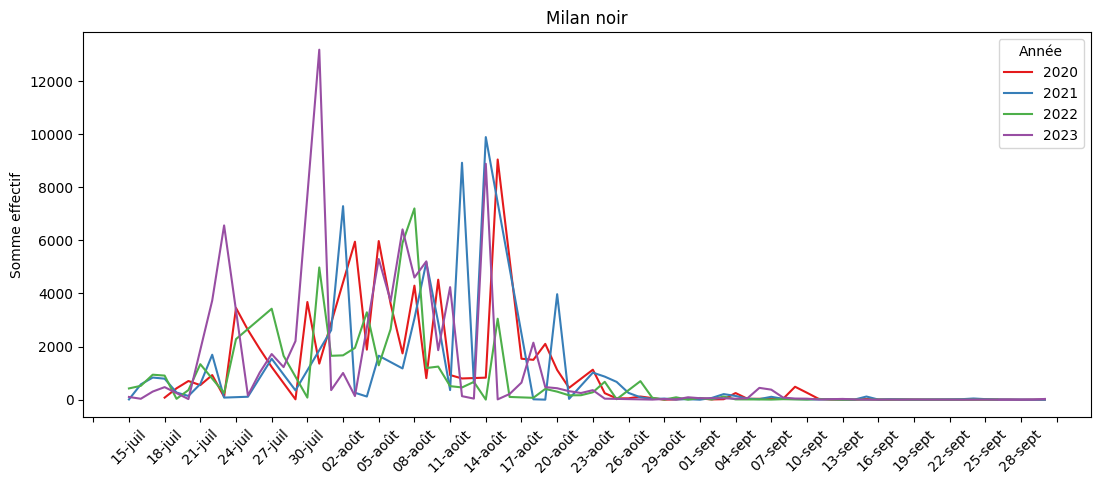

In [248]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

milan_noir_2020_to_2023_plot = sns.lineplot(data=milan_noir_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
milan_noir_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Milan noir", label='Année');
fig = milan_noir_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/distribution_effectif_milan_noir_jour_2020_2023.png')

### Milan royal

In [251]:
milan_royal = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan royal'])]
milan_royal.species.unique()

array(['Milan royal'], dtype=object)

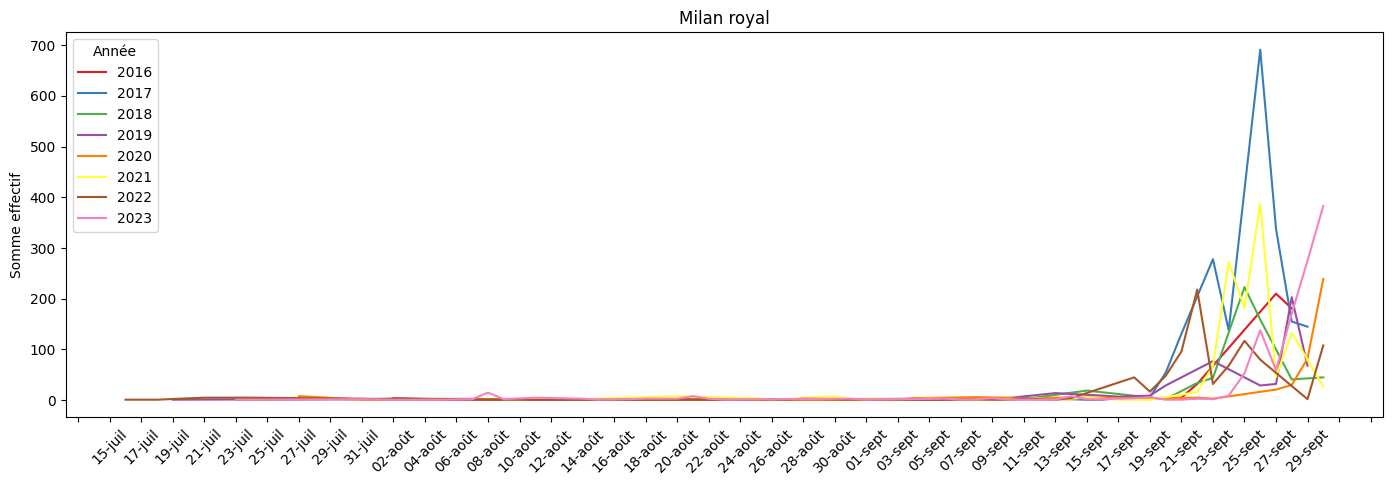

In [257]:
# Figure all years
plt.figure(figsize=(17, 5))

milan_royal_plot = sns.lineplot(data=milan_royal, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_royal_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Milan royal");

#Save image to folder
fig = milan_royal_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_milan_royal_jour_tous_les_ans.png')

In [254]:
milan_royal_2020_to_2023 = milan_royal[milan_royal['Année'].isin([2020, 2021, 2022, 2023])]
milan_royal_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1252,2022,2022-07-16,Milan royal,1.0,16-juil
1256,2022,2022-07-18,Milan royal,1.0,18-juil
1262,2022,2022-07-21,Milan royal,5.0,21-juil
1522,2023,2023-07-23,Milan royal,1.0,23-juil
1266,2022,2022-07-24,Milan royal,5.0,24-juil


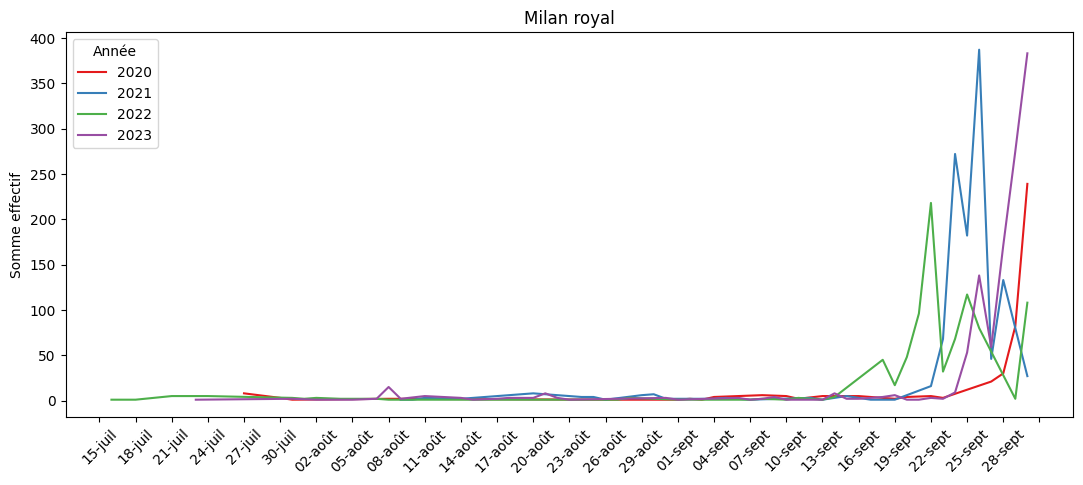

In [256]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

milan_royal_2020_to_2023_plot = sns.lineplot(data=milan_royal_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
milan_royal_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Milan royal", label='Année');
fig = milan_royal_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_milan_royal_jour_2020_2023.png')

### Bondrée apivore

In [259]:
bondree = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Bondrée apivore'])]
bondree.species.unique()

array(['Bondrée apivore'], dtype=object)

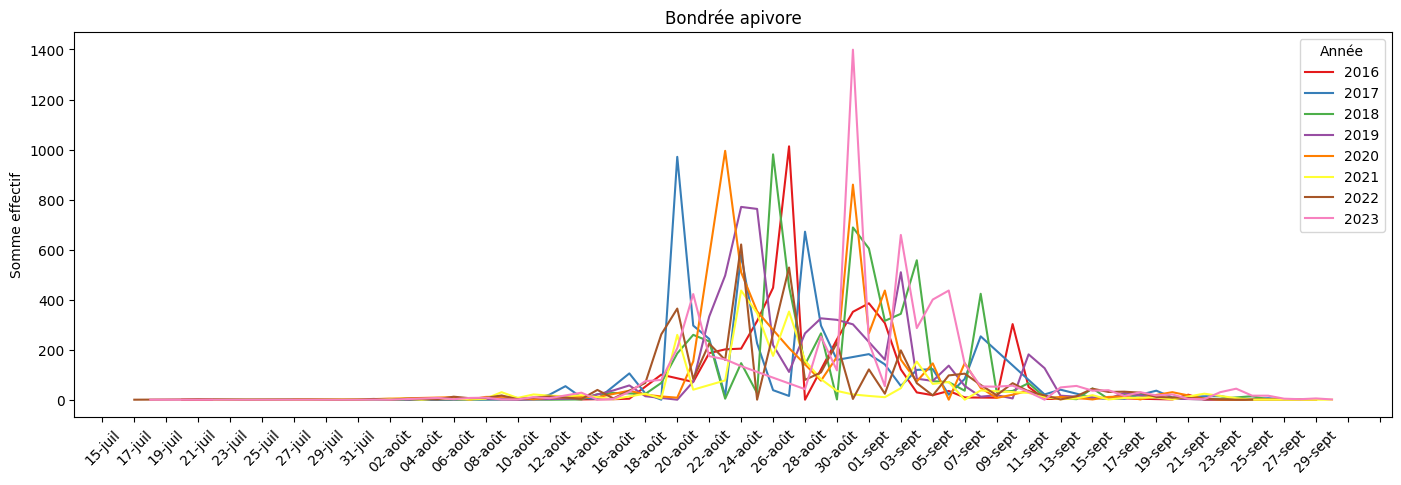

In [263]:
# Figure all years
plt.figure(figsize=(17, 5))

bondree_plot = sns.lineplot(data=bondree, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
bondree_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Bondrée apivore");

#Save image to folder
fig = bondree_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_bondree_jour_tous_les_ans.png')

In [264]:
bondree_2020_to_2023 = bondree[bondree['Année'].isin([2020, 2021, 2022, 2023])]
bondree_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1253,2022,2022-07-17,Bondrée apivore,1.0,17-juil
1517,2023,2023-07-18,Bondrée apivore,1.0,18-juil
1258,2022,2022-07-20,Bondrée apivore,2.0,20-juil
1260,2022,2022-07-21,Bondrée apivore,3.0,21-juil
999,2021,2021-07-22,Bondrée apivore,1.0,22-juil


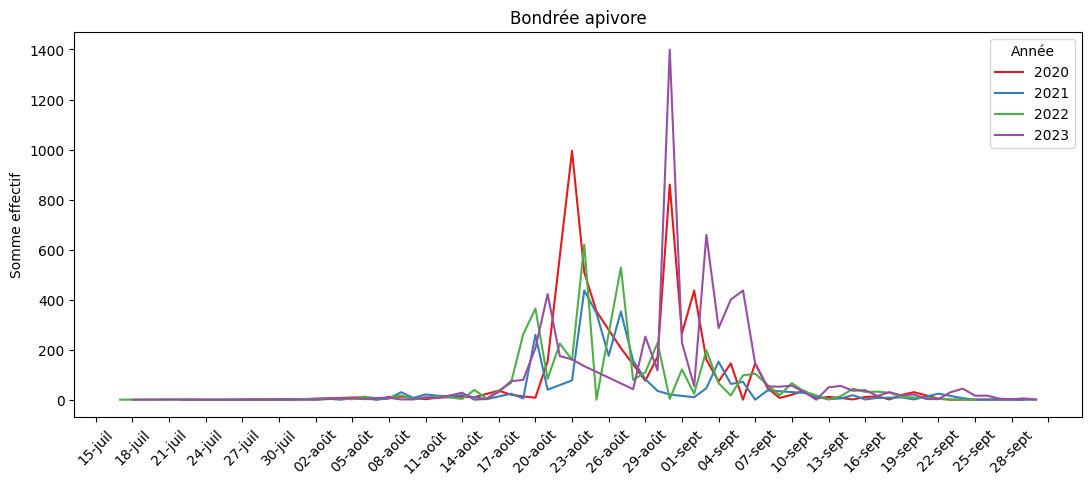

In [266]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

bondree_2020_to_2023_plot = sns.lineplot(data=bondree_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
bondree_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Bondrée apivore", label='Année');
fig = bondree_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_bondree_apivore_jour_2020_2023.png')

### Cigogne noire

In [267]:
cigogne_noire = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Cigogne noire'])]
cigogne_noire.species.unique()

array(['Cigogne noire'], dtype=object)

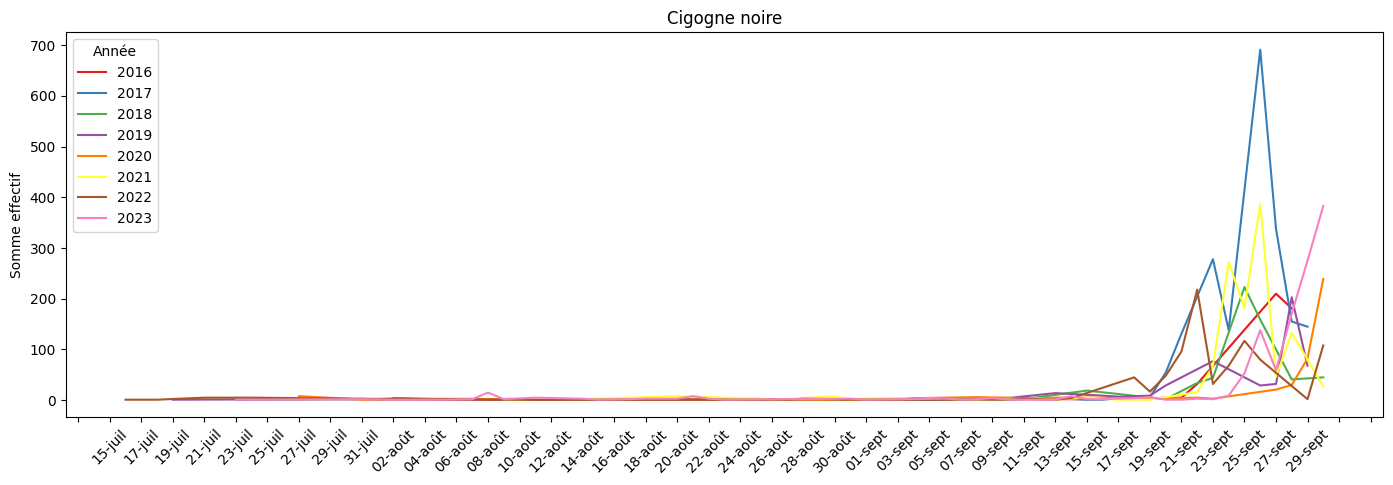

In [268]:
# Figure all years
plt.figure(figsize=(17, 5))

cigogne_noire_plot = sns.lineplot(data=milan_royal, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_noire_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Cigogne noire");

#Save image to folder
fig = cigogne_noire_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_cigogne_noire_jour_tous_les_ans.png')

In [270]:
cigogne_noire_2020_to_2023 = cigogne_noire[cigogne_noire['Année'].isin([2020, 2021, 2022, 2023])]
cigogne_noire_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1525,2023,2023-07-26,Cigogne noire,1.0,26-juil
1004,2021,2021-07-27,Cigogne noire,1.0,27-juil
806,2020,2020-07-31,Cigogne noire,1.0,31-juil
1532,2023,2023-07-31,Cigogne noire,4.0,31-juil
1007,2021,2021-08-01,Cigogne noire,6.0,01-août


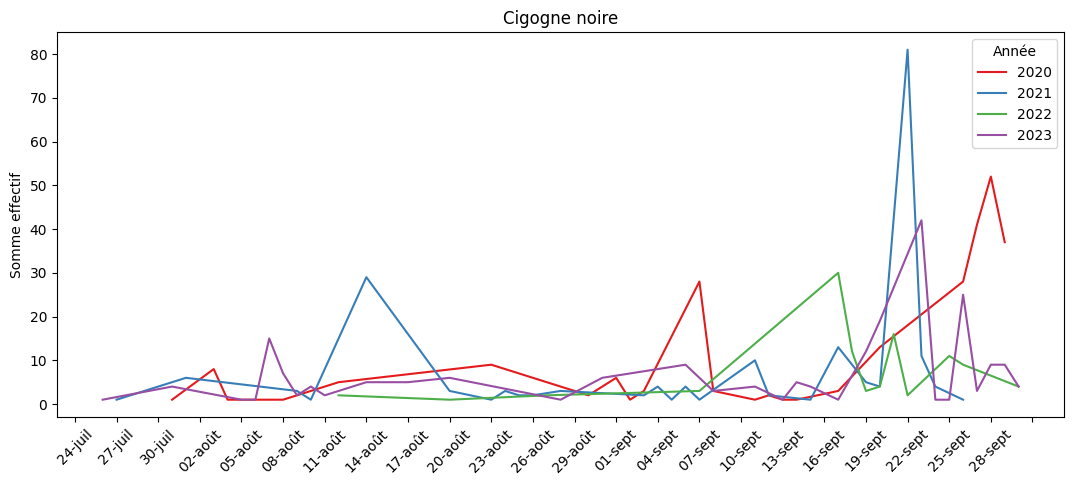

In [271]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

cigogne_noire_2020_to_2023_plot = sns.lineplot(data=cigogne_noire_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
cigogne_noire_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Cigogne noire", label='Année');
fig = cigogne_noire_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_cigogne_noire_jour_2020_2023.png')

### Cigogne blanche

In [272]:
cigogne_blanche = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Cigogne blanche'])]
cigogne_blanche.species.unique()

array(['Cigogne blanche'], dtype=object)

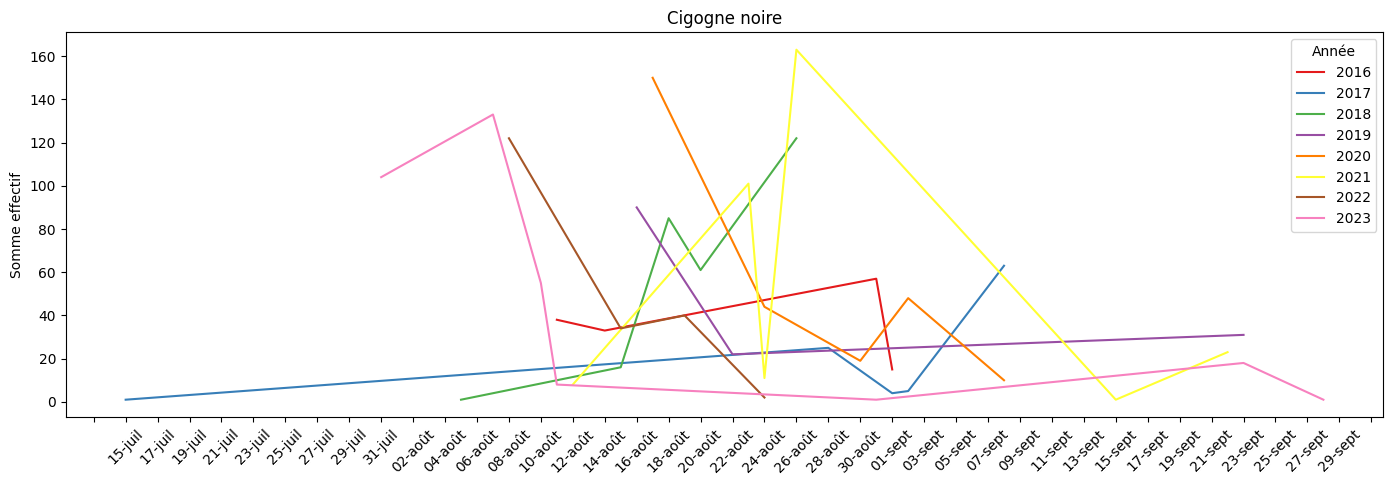

In [273]:
# Figure all years
plt.figure(figsize=(17, 5))

cigogne_blanche_plot = sns.lineplot(data=cigogne_blanche, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_blanche_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Cigogne blanche");

#Save image to folder
fig = cigogne_blanche_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_cigogne_blanche_jour_tous_les_ans.png')

In [274]:
cigogne_blanche_2020_to_2023 = cigogne_blanche[cigogne_blanche['Année'].isin([2020, 2021, 2022, 2023])]
cigogne_blanche_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1531,2023,2023-07-31,Cigogne blanche,104.0,31-juil
1550,2023,2023-08-07,Cigogne blanche,133.0,07-août
1297,2022,2022-08-08,Cigogne blanche,122.0,08-août
1565,2023,2023-08-10,Cigogne blanche,55.0,10-août
1569,2023,2023-08-11,Cigogne blanche,8.0,11-août


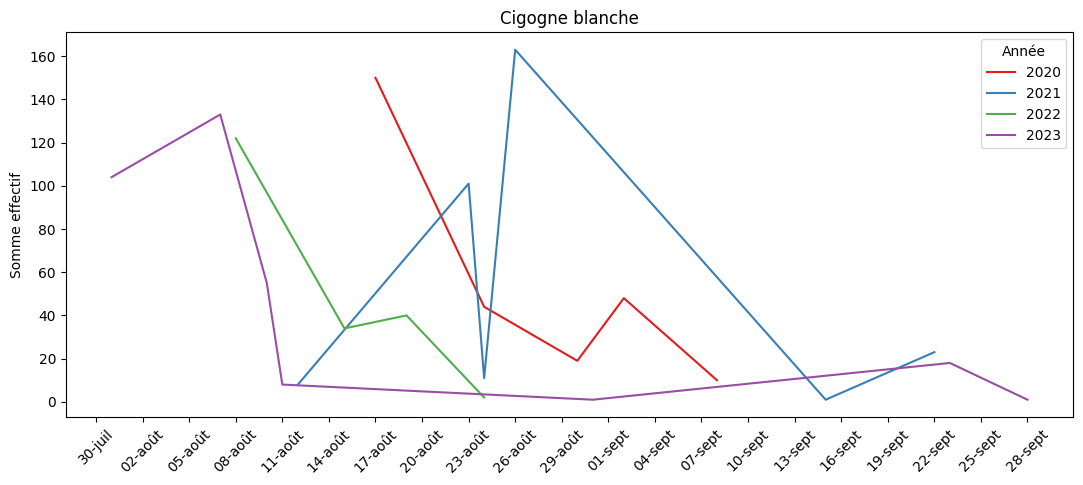

In [275]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

cigogne_blanche_2020_to_2023_plot = sns.lineplot(data=cigogne_blanche_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
cigogne_blanche_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Cigogne blanche", label='Année');
fig = cigogne_blanche_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_cigogne_blanche_jour_2020_2023.png')

### Epervier d'Europe

In [276]:
epervier = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Épervier d’Europe'])]
epervier.species.unique()

array(['Épervier d’Europe'], dtype=object)

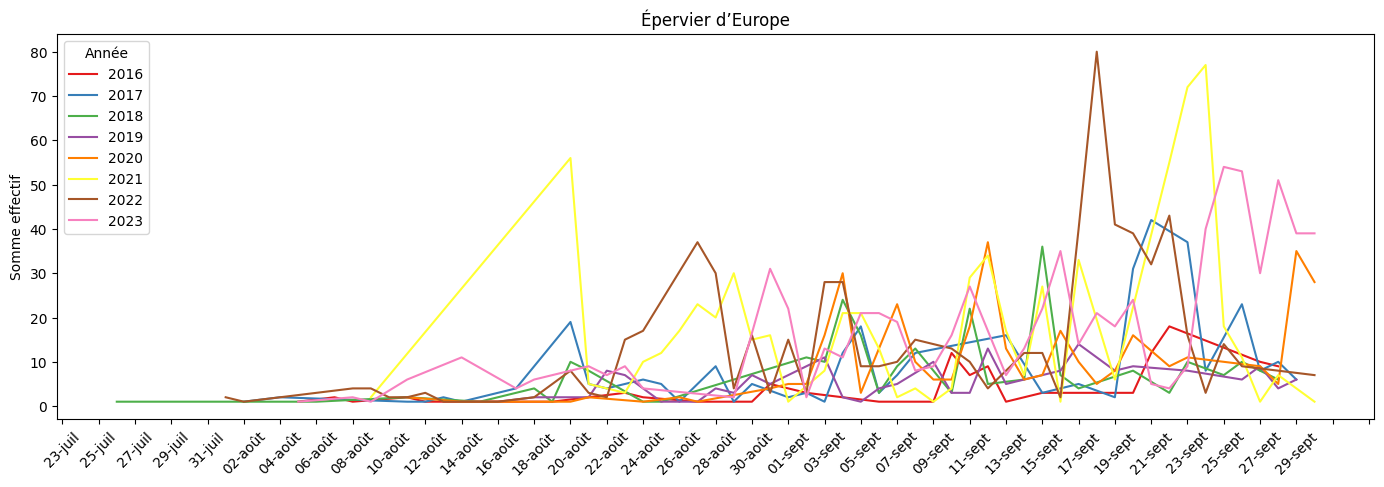

In [277]:
# Figure all years
plt.figure(figsize=(17, 5))

epervier_plot = sns.lineplot(data=epervier, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
epervier_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Épervier d’Europe");

#Save image to folder
fig = epervier_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_epervier_jour_tous_les_ans.png')

In [278]:
epervier_2020_to_2023 = epervier[epervier['Année'].isin([2020, 2021, 2022, 2023])]
epervier_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1279,2022,2022-08-01,Épervier d’Europe,2.0,01-août
1283,2022,2022-08-02,Épervier d’Europe,1.0,02-août
1545,2023,2023-08-05,Épervier d’Europe,1.0,05-août
1558,2023,2023-08-08,Épervier d’Europe,2.0,08-août
1300,2022,2022-08-08,Épervier d’Europe,4.0,08-août


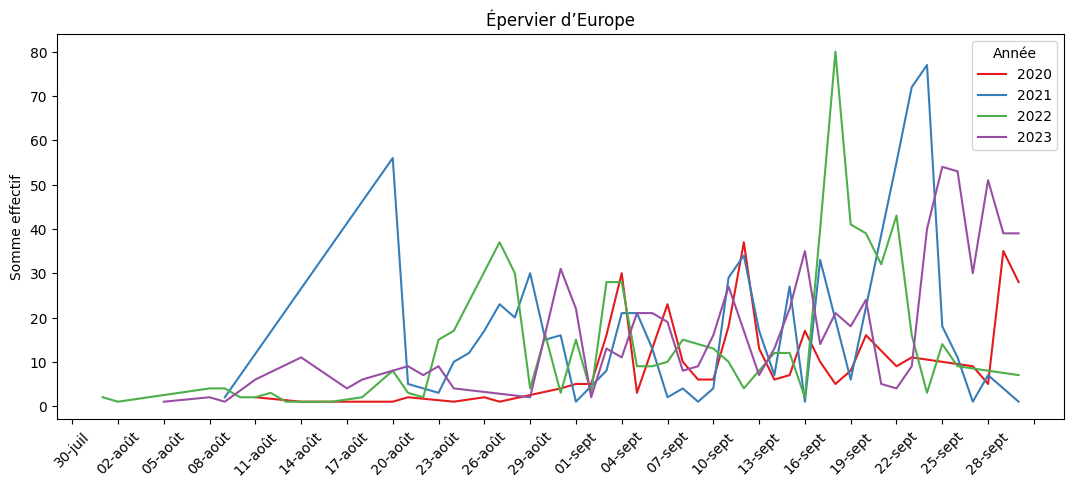

In [279]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

epervier_2020_to_2023_plot = sns.lineplot(data= epervier_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
epervier_2020_to_2023_plot.set(xlabel ="", ylabel = "Somme effectif", title ="Épervier d’Europe", label='Année');
fig = epervier_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_epervier_jour_2020_2023.png')